# **Etapa 1 - Pré-processamento**

Realize todas a fases de pré-processamento, incluindo:
* Remoção de atributos faltantes.
* Normalização ou padronização.
* Transformação de valores, se for o caso.

In [1]:
#importações utilizadas neste Projeto
import warnings
warnings.filterwarnings('ignore') #ignorar erros
import pandas as pd # biblioteca para o processamento de dados, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #biblioteca para gráficos e visualização de dados
import seaborn as sns #biblitoca para visualização de dados baseada no matplotlib
from sklearn.model_selection import train_test_split #treinamento dos modelos
from sklearn.metrics import classification_report, confusion_matrix #métricas de classificação

#Importa os métodos de classificação

#import tree
from sklearn.tree import DecisionTreeClassifier
# importing RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
#import KNN
from sklearn.neighbors import KNeighborsClassifier
#import Naive Bayes
from sklearn.naive_bayes import GaussianNB
#import SVM
from sklearn.svm import SVC
#import rede neural MLP
from sklearn.neural_network import MLPClassifier


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_cancer = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kag_risk_factors_cervical_cancer.csv') #carregar o arquivo csv para o data frame wine
df_cancer.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


In [4]:
# Procurante atributos faltantes nos dados
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [5]:
#verificar se existe coluna com ?
condition = df_cancer['Num of pregnancies'] == '?'
print(df_cancer['Num of pregnancies'][condition])

9      ?
18     ?
19     ?
41     ?
96     ?
123    ?
167    ?
185    ?
197    ?
265    ?
272    ?
365    ?
421    ?
544    ?
545    ?
650    ?
651    ?
652    ?
653    ?
654    ?
689    ?
690    ?
691    ?
692    ?
693    ?
694    ?
695    ?
696    ?
697    ?
698    ?
699    ?
700    ?
701    ?
702    ?
703    ?
704    ?
705    ?
706    ?
707    ?
708    ?
744    ?
745    ?
807    ?
808    ?
809    ?
810    ?
811    ?
812    ?
813    ?
814    ?
815    ?
816    ?
817    ?
818    ?
819    ?
820    ?
Name: Num of pregnancies, dtype: object


In [6]:
#df_cancer = df_cancer.dropna(subset=['pH']) #exemplo para remover as linhas que possuem dados faltantes
#df_cancer.update(df_cancer['Hormonal Contraceptives (years)'].fillna(0)) #exemplo para substituir NaN por 0
df_cancer= df_cancer.replace('?',0)

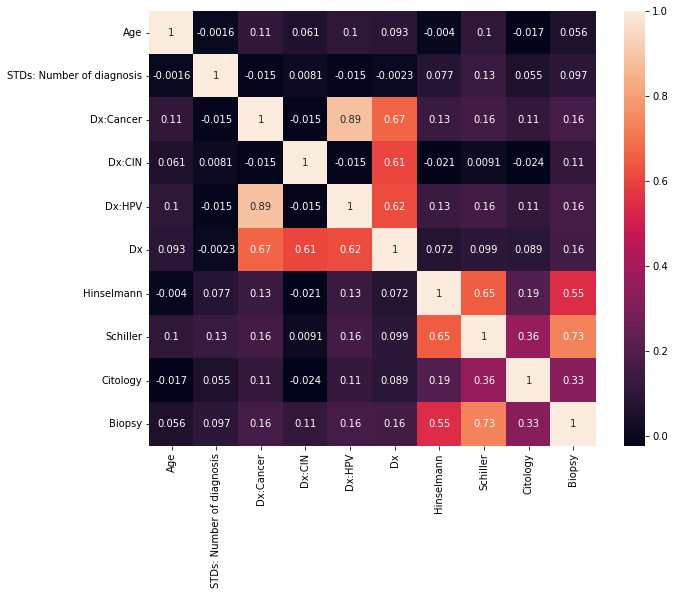

In [7]:
#gráfico de correlação entre as variáveis - utiliza o default o método de Pearson - Exemplo: https://www.inf.ufsc.br/~vera.carmo/Correlacao/Correlacao_Pearson_Spearman_Kendall.pdf
plt.figure(figsize = (10,8))
sns.heatmap(df_cancer.corr(),annot=True)

In [8]:
#contagem das diferentes classes presentes no dataset
print("Contagem da variável output")
df_cancer['Biopsy'].value_counts()

Contagem da variável output


0    803
1     55
Name: Biopsy, dtype: int64

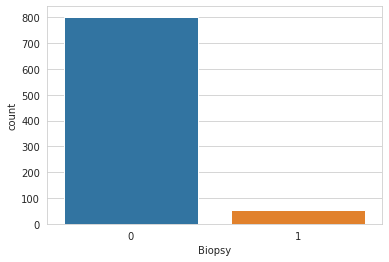

In [9]:
#exibe gráfico de coluna
sns.set_style('whitegrid')
sns.countplot(df_cancer['Biopsy'])

In [10]:
#Separa os dados em 2 conjuntos X (variáveis de entrada) e Y (variável preditora)
X = df_cancer.drop('Biopsy', axis = 1)
y = df_cancer['Biopsy']

In [11]:
#separa os dados em treinamento (70%) e teste (30% )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [12]:
print(X_train)

     Age Number of sexual partners First sexual intercourse  \
59    35                       3.0                     17.0   
641   39                       2.0                     18.0   
42    36                       3.0                     18.0   
463   14                       1.0                     14.0   
235   25                       2.0                     17.0   
..   ...                       ...                      ...   
350   20                       1.0                     18.0   
79    35                       2.0                     19.0   
835   24                       1.0                     14.0   
792   23                       3.0                     15.0   
520   17                       2.0                     14.0   

    Num of pregnancies Smokes Smokes (years) Smokes (packs/year)  \
59                 4.0    0.0            0.0                 0.0   
641                2.0    0.0            0.0                 0.0   
42                 3.0    1.0    1.2669

In [13]:
#transforma os dados na mesma escala - normaliza os dados
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [14]:
print(X_train)

[[ 0.90307605  0.334985    0.03284356 ... -0.21282896 -0.29153209
  -0.21707238]
 [ 1.34848963 -0.22487851  0.34563936 ... -0.21282896 -0.29153209
  -0.21707238]
 [ 1.01442944  0.334985    0.34563936 ... -0.21282896 -0.29153209
  -0.21707238]
 ...
 [-0.32181132 -0.78474201 -0.90554385 ... -0.21282896 -0.29153209
  -0.21707238]
 [-0.43316471  0.334985   -0.59274805 ... -0.21282896 -0.29153209
  -0.21707238]
 [-1.10128509 -0.22487851 -0.90554385 ... -0.21282896 -0.29153209
  -0.21707238]]


# **Etapa 2 - Classificadores**
Algoritmos de Classificação:

* K-vizinhos (encontre o melhor k)
* Árvore de decisão
* Naive Bayes
* SVM (encontre o melhor C)
* Random Forest (encontre o melhor número de estimadores)

In [15]:
#realiza o treinamento no modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train, y_train)

#realiza a predição
knn_pred = knn_model.predict(X_test)

Resultado do Modelo KNN
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       237
           1       0.71      0.24      0.36        21

    accuracy                           0.93       258
   macro avg       0.83      0.61      0.66       258
weighted avg       0.92      0.93      0.91       258

Resultado da matriz de Confusão do KNN


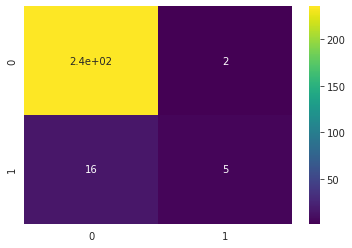

In [16]:
print("Resultado do Modelo KNN")
print(classification_report(y_test, knn_pred))
print("Resultado da matriz de Confusão do KNN")
confu_mat = confusion_matrix(y_test, knn_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [17]:
#realiza o treinamento no modelo Tree
tree_model = DecisionTreeClassifier() 
tree_model.fit(X_train, y_train)

#realiza a predição
tree_pred = tree_model.predict(X_test)


Resultado do Modelo Tree
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       237
           1       0.57      0.38      0.46        21

    accuracy                           0.93       258
   macro avg       0.76      0.68      0.71       258
weighted avg       0.92      0.93      0.92       258

Resultado da matriz de Tree


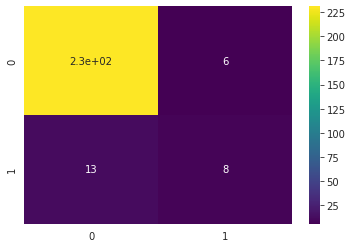

In [18]:
print("Resultado do Modelo Tree")
print(classification_report(y_test, tree_pred))
print("Resultado da matriz de Tree")
confu_mat = confusion_matrix(y_test, tree_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [19]:
#realiza o treinamento no modelo Gaussiano
gaus_model = GaussianNB()
gaus_model.fit(X_train, y_train)

#realiza a predição
gaus_pred = gaus_model.predict(X_test)


Resultado do Modelo Naive Bayes
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       237
           1       0.00      0.00      0.00        21

    accuracy                           0.92       258
   macro avg       0.46      0.50      0.48       258
weighted avg       0.84      0.92      0.88       258

Resultado da matriz de Naive Bayes


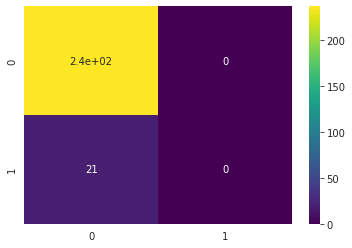

In [20]:
print("Resultado do Modelo Naive Bayes")
print(classification_report(y_test, gaus_pred))
print("Resultado da matriz de Naive Bayes")
confu_mat = confusion_matrix(y_test, gaus_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [21]:
#realiza o treinamento no modelo SVM
svm_model = SVC(C=1) 
svm_model.fit(X_train, y_train)

#realiza a predição
svm_pred = svm_model.predict(X_test)

Resultado do Modelo SVM
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       237
           1       0.67      0.10      0.17        21

    accuracy                           0.92       258
   macro avg       0.80      0.55      0.56       258
weighted avg       0.90      0.92      0.89       258

Resultado da matriz de SVM


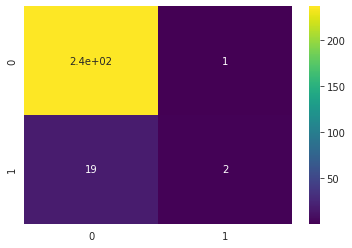

In [22]:
print("Resultado do Modelo SVM")
print(classification_report(y_test, svm_pred))
print("Resultado da matriz de SVM")
confu_mat = confusion_matrix(y_test, svm_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [23]:
#realiza o treinamento no modelo RandomForest
ran_fc = RandomForestClassifier(n_estimators=100)
ran_fc.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
#realiza a predição ou seja o teste
rfc_pred = ran_fc.predict(X_test)

In [25]:
print("Resultado do Modelo RandomForest")
print(classification_report(y_test, rfc_pred)) #realiza a comparação entre o real e o predito

Resultado do Modelo RandomForest
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       237
           1       0.71      0.24      0.36        21

    accuracy                           0.93       258
   macro avg       0.83      0.61      0.66       258
weighted avg       0.92      0.93      0.91       258



Resultado da matriz de Confusão do RandomForest


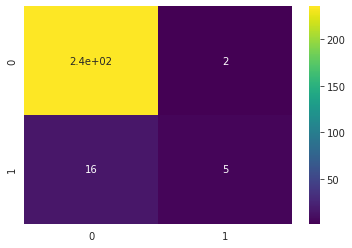

In [26]:
print("Resultado da matriz de Confusão do RandomForest")
confu_mat = confusion_matrix(y_test, rfc_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')

In [27]:
#realiza o treinamento no modelo Rede Neural Multi Layer Perceptron
mlp_model = MLPClassifier(random_state=1, max_iter=400) 
mlp_model.fit(X_train, y_train)

#realiza a predição
mlp_pred = mlp_model.predict(X_test)

Resultado do Modelo Rede Neural Multi Layer Perceptron
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       237
           1       0.62      0.24      0.34        21

    accuracy                           0.93       258
   macro avg       0.78      0.61      0.65       258
weighted avg       0.91      0.93      0.91       258

Resultado da matriz Rede Neural Multi Layer Perceptron


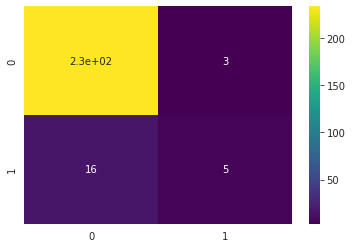

In [28]:
print("Resultado do Modelo Rede Neural Multi Layer Perceptron")
print(classification_report(y_test, mlp_pred))
print("Resultado da matriz Rede Neural Multi Layer Perceptron")
confu_mat = confusion_matrix(y_test, mlp_pred)
plt.figure(figsize = (6, 4))
sns.heatmap(confu_mat, annot = True, cmap = 'viridis')